In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<img src="group_a.png" width=500 height=500 align="center">


<img src="group_a_team.jpg" width=800 height=600 align="center">
Last revision: 30/Juli/2022

# <font color=DarkRed>__Python Assignment Group A - Fairdetect Test - Part I__</font>

# Sections 
* [Libaries used](#0)
* [1. Fairdetect Description](#1)
* [2. Model Improvement](#2)
* [3. Loading synthetic credit card approval dataset](#3)
* [4. Exploratory Data Analysis](#4)  
  * [4.1 Profile Pandas](#4.1)
  * [4.2 Own EDA](#4.2)
* [5. Data Cleansing](#5) 
* [6. Data Splitting](#6)
* [7. Model Training](#7)
* [8. Testing Bias with FairDetect](#8)
* [9. SHapley Additive exPlanations (SHAP)](#9)
* [10. Docstrings](#10)
* [11. Google´s What if tool](#11)
* [12. FairML](#12)
* [13. Additonal Analysis - Bias Result](#13)

<a id='0'></a>
# Libaries and pip installments used

# ***Installing dependencies***  

### Skip if you already installed pandas-profiling tool

In [2]:
#Installs Pandas Profiling Tool from an alternative repository
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip      
!pip install pyyaml==5.4.1 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [4]:
pip install fair-detect-group-a

Note: you may need to restart the kernel to use updated packages.


# Importing Ryan's functions now converted as classes

In [5]:
#Original code is fairdetect_functions
from fair_detect_group_a import *
#import fairdetect_classes 
#from ai-bias-detect import FairDetect, Report, Backup, EnhancedLabelEncoder, Splitting
#Everything is imported from the fairdetect_classes import list so next lines are skippable

<a id='1'></a>
# 1. Fairdetect description

# Transparent Unfairness - How to Use the  Methods from fairdetect_classes.py

## An approach to detecting and understanding machine learning bias, by Ryan Daher

### Improvements made by Group A - MBD Part Time 2022-23

Congregating the various theoretical concepts into a practical framework, we can follow the “theoretical lens of a ‘sense-plan-act’ cycle”, as described by the HLEG framework (European Commission and Directorate-General for Communications Networks, Content and Technology, 2019). Applying this concept to the problem of ML fairness, we can break down three core steps in providing robust, and responsible artificial intelligence: Identify, Understand, and Act (IUA).

1. __Identify__: The process of exposing direct or indirect biases within a dataset and/or model.
1. __Understand__: The process of isolating impactful scenarios and obtaining trans parent explanations for outcomes.
1. __Act__: The process of reporting and rectifying identified disparities within the

By understanding the philosophical forms of unfairness as defined by our review of the literature and categorizing our prominent fairness metrics into the overarching categories of representation, ability, and performance, we can establish a series of tests to “identify” levels of disparities between sensitive groups at different levels. Merging these findings with the explainability of our models through the use of white-box models, or Shapley value estimation for black-box models, we can dig deeper into the model’s predictions, “understanding” how classifications were made, and how they varied from the natural dataset exposing both natural biases as well as added model differences. Finally, by probing further into levels of misclassification, in particular looking at negative outcomes, we can isolate groups most at risk and set up a series of “actions” that can be taken to mitigate the effects. Given this three-step framework which combines societal, legal, and technical considerations, the paper will then go through a series of cases, and examine the proposed framework.



# Let's use fairdetect_classes to find biases
For using fairdetect_classes we need create a model, for this we will:
1. Import methods from classes files__ from fairdetect_classes (done at the beginning)
1. then __load a dataset__, in this case we will use: synthetic credit card approval (already loaded with synthetic credit)
1. then __clean and prepare the dataset__ for modeling, there are some duplicates in this case, we will take care of them below
1. then we __split the data in train and test sets__ 
1. then we __build a model__, in this case we applying a Machine Learning (ML) model called XGBoost Classifier. The reason for choosing a ML is that ML models are harded to visualize, sometimes called Black Box models, what makes very difficult to see if any bias is present in the model.



<a id='2'></a>
# 2. Model Improvement 

The following improvements has been exposed to the model of Ryan 
1. Transformed the functions into __classes__ 
2. The functions missed proper __docstrings documentation__ 
3. For user inputs __errors__ raise 
4. _Additional __EDA__ has been integrated into Ryan model to give it more richness in the model explaination and analysis 
5. The __label encoder__ has been integrated in the class and __automatically__ identify categorial variables and use the output for further analysis 
6. For completness the __splitting the data__ into train and test has been incorporated into the class 
7. Testing Bias with FairDetect gives additional valuable graphics that were missed like __confusion matrix,__ __receiver operating characteristic curve, precision & recall curve, classification table and the AUC value, and two additional shap graphics__ 

<a id='3'></a>
# 3. Loading synthetic credit card approval dataset

Make sure the sql db file is within the same folder!!

In [6]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("synthetic_credit_card.db")
data = pd.read_sql_query("SELECT * from credit_card", con)

# Verify that result of SQL query is stored in the dataframe
print(data.head())

con.close()

   id  children  group  income  own_car  own_housing  target
0   1         4      0   36151        0            0       0
1   2         0      0   36095        1            0       0
2   3         2      1   62110        1            1       0
3   4         0      1   73644        1            0       0
4   5         3      0   99146        0            0       1


## Making a backup of original dataframe in case we need to compare later

In [7]:
data2 = data.copy()

## Taking a look at how the data looks like (Head, describe and value counts...)

In [8]:
data.describe()

,id,children,group,income,own_car,own_housing,target
count,500000.000000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000,500000.000000
mean,250000.500000,2.000346,0.50065,72507.446898,0.700930,0.401612,0.386626
std,144337.711634,1.410574,0.50000,22960.209440,0.457851,0.490225,0.486977
min,1.000000,0.000000,0.00000,30000.000000,0.000000,0.000000,0.000000
25%,125000.750000,1.000000,0.00000,53321.000000,0.000000,0.000000,0.000000
50%,250000.500000,2.000000,1.00000,72060.000000,1.000000,0.000000,0.000000
75%,375000.250000,3.000000,1.00000,90670.250000,1.000000,1.000000,1.000000
max,500000.000000,11.000000,1.00000,119999.000000,1.000000,1.000000,1.000000


In [9]:
data.dtypes

id             int64
children       int64
group          int64
income         int64
own_car        int64
own_housing    int64
target         int64
dtype: object

In [10]:
data.head()

,id,children,group,income,own_car,own_housing,target
0,1,4,0,36151,0,0,0
1,2,0,0,36095,1,0,0
2,3,2,1,62110,1,1,0
3,4,0,1,73644,1,0,0
4,5,3,0,99146,0,0,1


In [11]:
data.value_counts('own_car')

own_car
1    350465
0    149535
dtype: int64

3/4 own a vehicle

In [12]:
data.value_counts('own_housing')

own_housing
0    299194
1    200806
dtype: int64

3/5 do not own a house

<a id='4'></a>

# 4. Exploratory Data Analysis 
### Analysis of the dataset 



<a id='4.1'></a>
## 4.1 Pandas Profiling 
### Do not run if pandas-profiling tool is not installed

In [13]:
from pandas_profiling import ProfileReport
report = ProfileReport(data, minimal=False)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Remarks from the EDA

- 6 attributes all integers: number of children, group, income, own car, own house and target (for a credit card)

- 1/2 million records, no missing values but 45000 duplicates

- Group attribute is almost symmetrical, 50 - 50 %

- Number of children, majority of this sample has either 2 or 3

- The average salary is at 72,000 

- Most of the sample population has a car but not a home

- Only 2/5 are target for a credit card, income being the most correlated variable of the 5



<a id='4.2'></a>
## 4.2. Own EDA  

## Alternative to Pandas-profiling tool to understand better the initial biases (user experience enhancement)

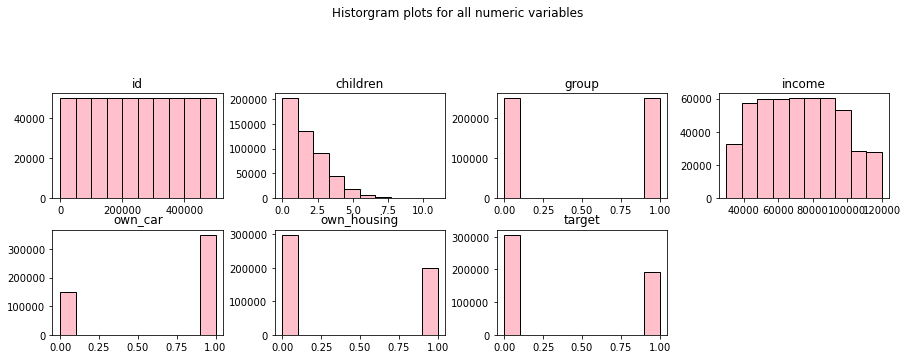

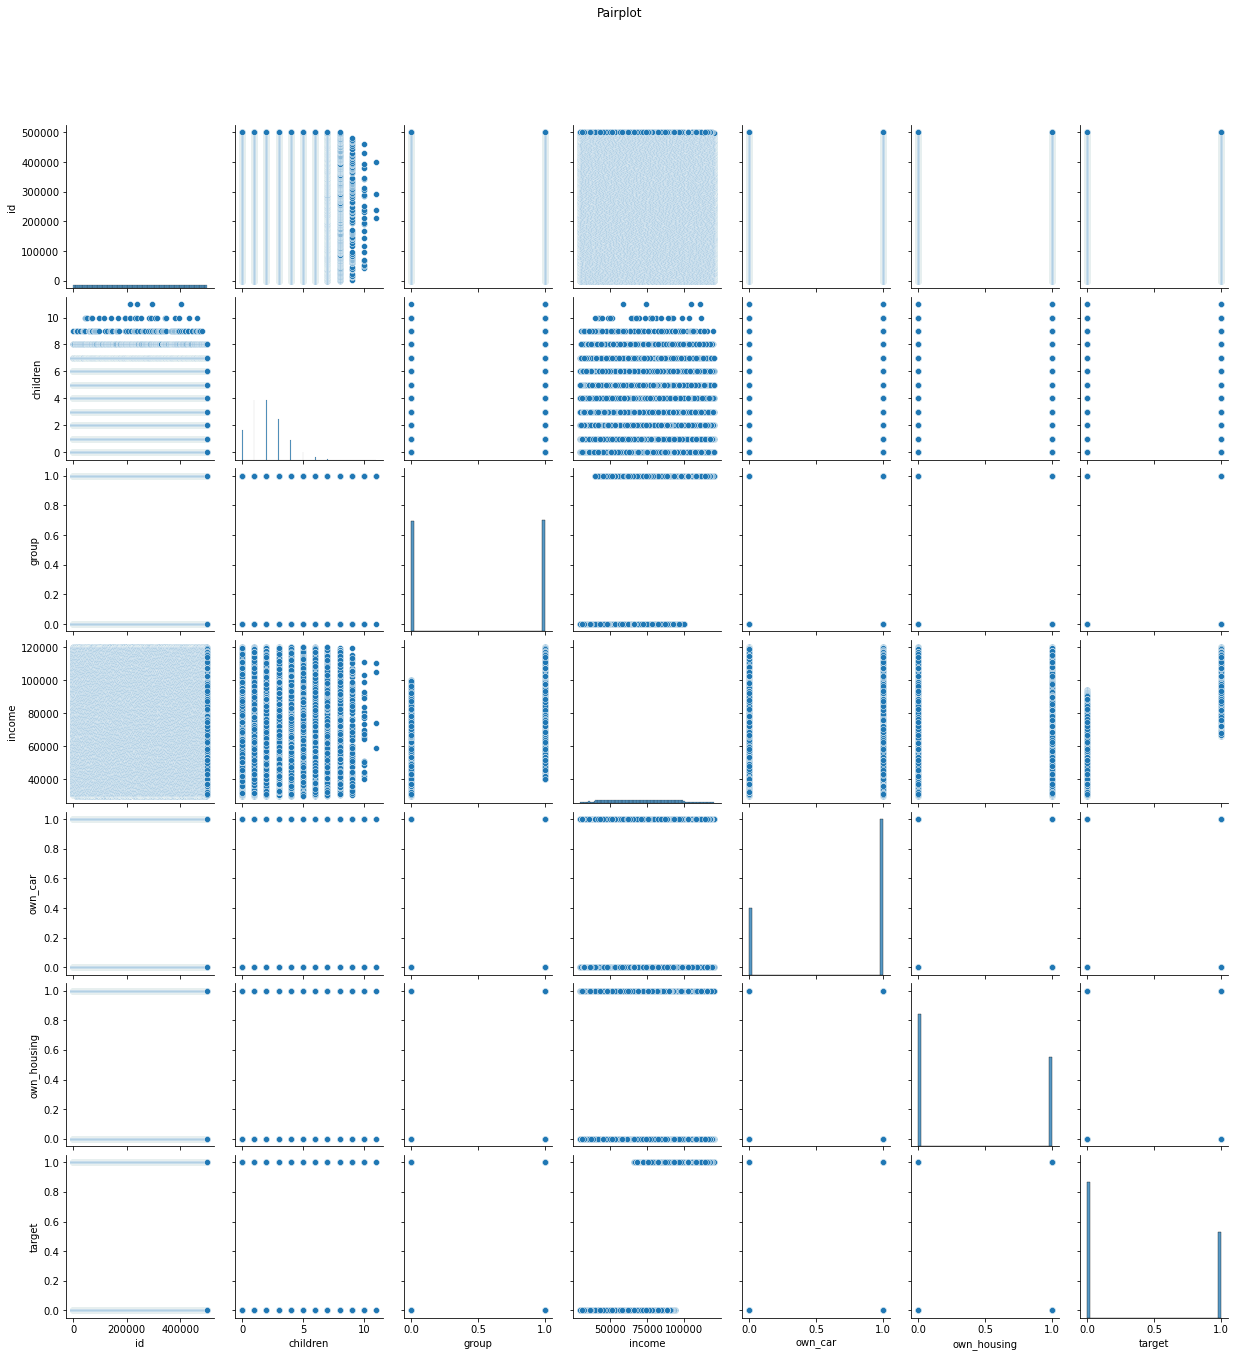

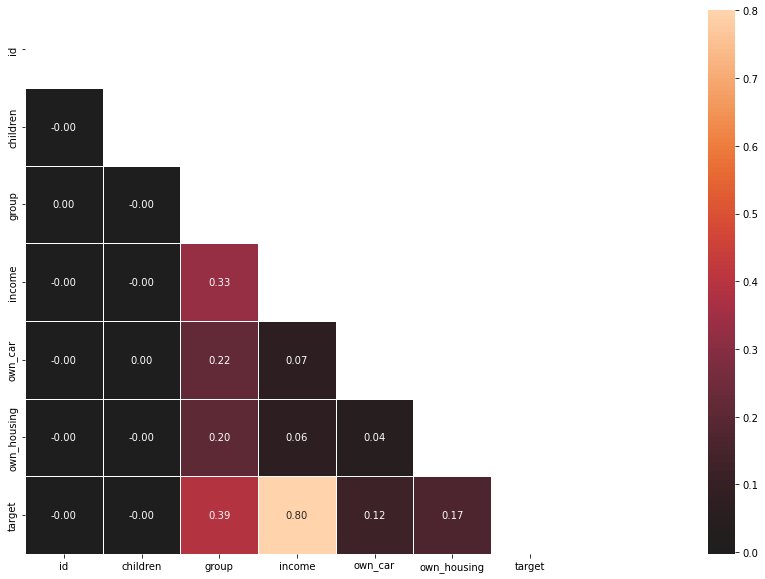

Violin plots are not supported with integer type, use a dataset with object type


(array([[<AxesSubplot:title={'center':'id'}>,
         <AxesSubplot:title={'center':'children'}>,
         <AxesSubplot:title={'center':'group'}>,
         <AxesSubplot:title={'center':'income'}>],
        [<AxesSubplot:title={'center':'own_car'}>,
         <AxesSubplot:title={'center':'own_housing'}>,
         <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
       dtype=object),
 Text(0.5, 1.08, 'Pairplot'),
 <AxesSubplot:>,
 )

<Figure size 432x288 with 0 Axes>

<Figure size 2520x288 with 0 Axes>

In [14]:
r = Report()
r.profilereporting(data,'target')
# Must wait at least one minute

### Similar conclusions as with pandas-profiling
- Seems that income is highly correlated with Target

<a id='5'></a>
# 5. Data Cleaning
## Transforming/coding text into numbers

## Will only work with categorical variables. In this case, since we only have integers, it won't work!

In [17]:
from fair_detect_group_a import EnhancedLabelEncoder
le = EnhancedLabelEncoder()
le.fit_transform_columns(data)

,id,children,group,income,own_car,own_housing,target
0,1,4,0,36151,0,0,0
1,2,0,0,36095,1,0,0
2,3,2,1,62110,1,1,0
3,4,0,1,73644,1,0,0
4,5,3,0,99146,0,0,1
...,...,...,...,...,...,...,...
499995,499996,1,0,43299,1,1,0
499996,499997,8,1,75956,1,1,1
499997,499998,3,0,66476,0,0,0
499998,499999,2,1,74524,0,0,0


## Dropping duplicates

In [18]:
data.drop_duplicates()

,id,children,group,income,own_car,own_housing,target
0,1,4,0,36151,0,0,0
1,2,0,0,36095,1,0,0
2,3,2,1,62110,1,1,0
3,4,0,1,73644,1,0,0
4,5,3,0,99146,0,0,1
...,...,...,...,...,...,...,...
499995,499996,1,0,43299,1,1,0
499996,499997,8,1,75956,1,1,1
499997,499998,3,0,66476,0,0,0
499998,499999,2,1,74524,0,0,0


<a id='6'></a>
# 6. Data splitting to feed into the XGBOOST

## Splitting the data into train and test

In [25]:
from fair_detect_group_a import Splitting
sp = Splitting()
x_train, x_test, y_train, y_test = sp.split_data(data,'target') #define the dependent parameter 
print("Original data file now splitted in 4 files")

Original data file now splitted in 4 files


In [26]:
x_train.shape

(400000, 6)

In [27]:
x_test.shape

(100000, 6)

<a id='7'></a>
## 7. Training with the XGBoost model

In [28]:
#Skip if already installed
!pip install xgboost   

In [30]:
import xgboost
model = xgboost.XGBClassifier().fit(x_train, y_train)
y_test_predict = model.predict(x_test)
y_test_predict
print("Success: XGBoost model fitted")

Success: XGBoost model fitted


In [39]:
fd = FairDetect(model, x_test, y_test)

<a id='8'></a>
## 8. Testing Bias with FairDetect 
### Representation works now with classes implementation

Confusion Matrix


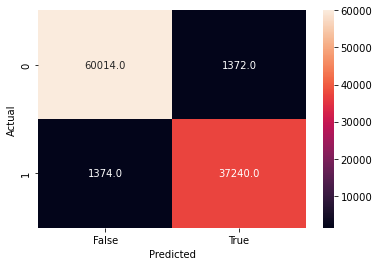

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


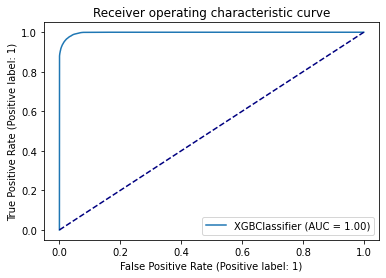

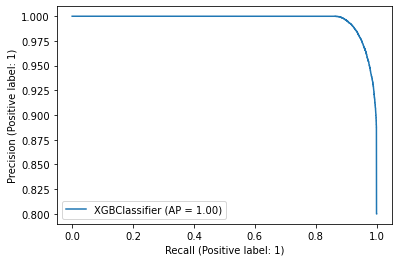

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     61386
           1       0.96      0.96      0.96     38614

    accuracy                           0.97    100000
   macro avg       0.97      0.97      0.97    100000
weighted avg       0.97      0.97      0.97    100000

AUC 0.9710333388806788
REPRESENTATION


╒════╤═══════════╤═══════════╕
│    │   GROUP A │   GROUP B │
╞════╪═══════════╪═══════════╡
│  0 │  0.804943 │  0.423006 │
├────┼───────────┼───────────┤
│  1 │  0.195057 │  0.576994 │
╘════╧═══════════╧═══════════╛ 

*** Reject H0: Significant Relation Between group and Target with p= 0.0


ABILITY


Accept H0: True Positive Disparity Not Detected. p= 0.7292086896427634
Accept H0: False Positive Disparity Not Detected. p= 0.5995181105479462
Accept H0: True Negative Disparity Not Detected. p= 0.9341776734466705
Accept H0: False Negative Disparity Not Detected. p= 0.12073696435054328


PREDICTIVE


Accept H0: No Significant Predictive Disparity. p= 0.6980363716306652


In [40]:
sensitive = 'group' # sensible variable one wants to test for biases
labels = {0:'GROUP A',1:'GROUP B'} # 0 - GROUP A and 1 - GROUP B Because we dont know yet what Group is referring to
fd.identify_bias(sensitive,labels)

## Analysing FairDetect output

With the synthetic dataset, we are provided with five, fact-based features to determine whether a candidate is a Target for a credit card. 
These are the number of children, an undefined group, the income made a year, whether you have a car or not, and, whether you own a house or not.

Among this datase, we are choosing as a sensitive group, the column Group. We do not know however if it makes reference to a civil status, gender, race, nationality or any other attribute. We know however, it is a binary attribute

To generate predictions, we will use an XGBoost classifier which received an overall train accuracy of 70% indicating moderate predictive performance in idetifying true positives and false negatives respectively

### Representation

We will begin by observing representation factors by  looking at the representation of both the GROUP labels and outcome labels (Target for a credit card). 

In this case and having undefined names for the groups, it can be seen they are similar in size. 

It can also be seen that most of the people are not a target for a credit card, with Group A having less chances of being targetted.

While the model will not train based on an unbalanced population sample due to it being symetrical, it seems to be the case Group B is the main target in credit cards, for which other factors have to be considered so to determine if there is a bias or not

REPRESENTATION

<table>
    
   <tr>
       <td></td>
       <td>GROUP A</td>
       <td>GROUP B</td>
    </tr>
   <tr>
       <td>0</td>
       <td>0.8049</td>
       <td>0.4230</td>
    </tr>
   <tr>
       <td>1</td>
       <td>0.1950</td>
       <td>0.5769</td>
    </tr>    
</table>



Testing for demographic parity, we look at the normalized contingency table between our GROUP categories and the target, running our chisquared assessment we obtain a p of 0.0, rejecting our null hypothesis of independence and indicating there is a significant relation between GROUP and the TARGET. 



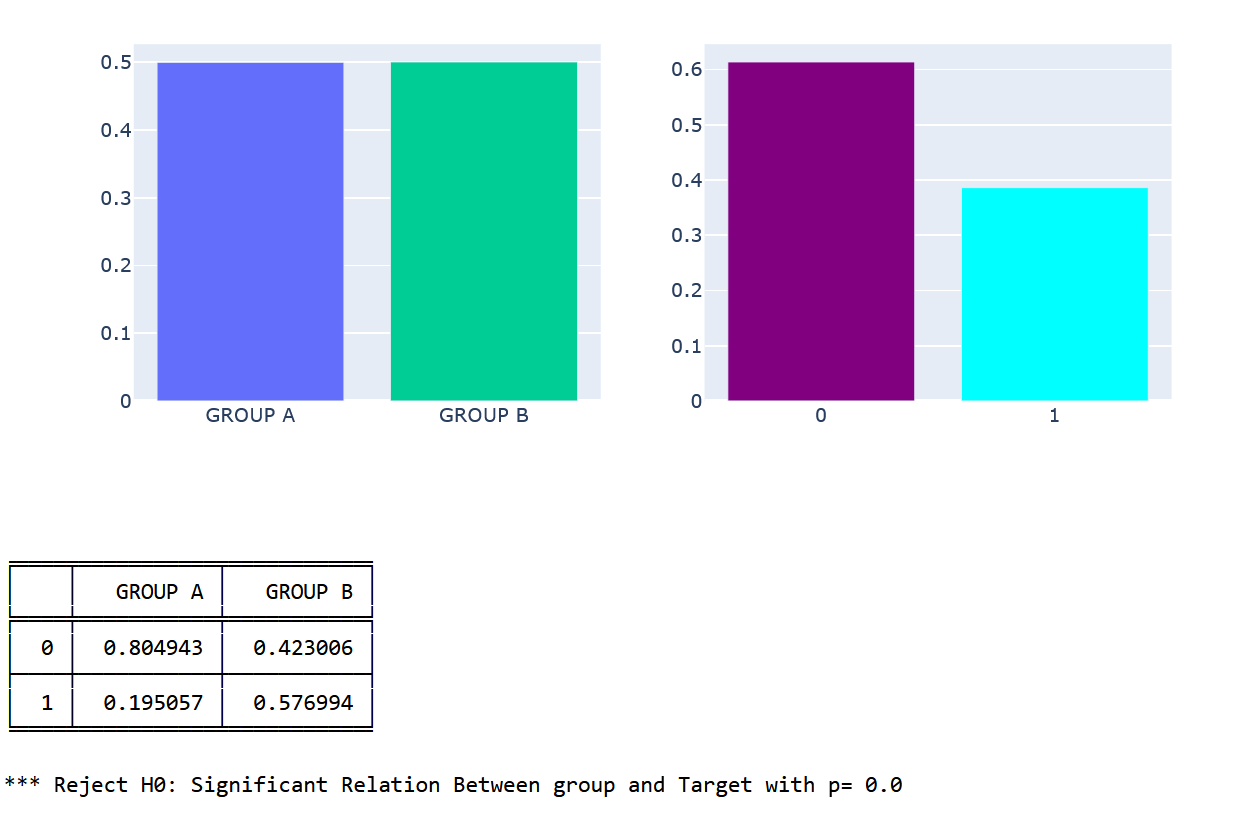

Moving then into the principle of ability, we compute our true-positive and false-positive rates for bpth groups

* True Positive Rate for GROUP A 92%
* True Positive Rate for GROUP B 97%

Based on our true positive rates, it seems as though we have a small difference between sensitive groups, however, running our chi-squared test, we obtain a p of .72, accepting our null, and indicating no significant difference between our true positive rates. This would thus satisfy equal opportunity for both GROUPS indicating both could be theoretically targetted in the same way.

* False Positive Rate for GROUP A 1%
* False Positive Rate for GROUP B 2%

In addition, the false-positive rates for both groups seem rather consistent with a p of .594, allowing us to accept our null hypothesis of no significant differences between the false-positive rates and noting similar levels of high-risk misclassifications for either group.

* True Negative Rate for GROUP A 98%
* True Negative Rate for GROUP B 97%

Looking at true negative rates in which our model correctly predicted proper low risk classifications we see similar scores for both groups supported by a p of .93, indicating similar levels of proper low-risk classifications for group.

* False Negative Rate for GROUP A: 7%
* False Negative Rate for GROUP B: 2%

Finally looking at false-negative rates we get a similar picture, it seems as though GROUP A are being incorrectly labeled as being of low TARGET at a much higher rate than GROUP B, supporting this is a p of .12, while the pvalue is still enough to accept the null hypothesis, it comes to show the possible bias towards GROUP A

* Precision for GROUP A: 92%
* Precision for GROUP B: 97%


Finally, to observe model exacerbation of biases through the lens of predictive parity, we notice a slight difference of 5 points in the precision scores for both groups. Looking at the chisquared test, however, we obtain a p of .69 signaling low significance of disparity, we are informed that the model is not greatly hindering either group, but rather enforcing  existing disparities. 

This is complimentary of our previous analysis in which we only hinted at a slight significant disparity among the false-negative rates.

Having understood the basis of the slight disparity detected, we can isolate the most affected group as being GROUP A that are incorrectly classified as being a low target for credit cards.

To further investigate, we must dive into the workings of the black-box model. To do so, we will introduce the idea of SHAP through the SHAP library. Our first
result is to observe key feature importance based on our sex cohorts.

<a id='9'></a>
## 9. SHapley Additive exPlanations (SHAP)
SHapley Additive exPlanations (SHAP): The Shapley value is a solution concept in cooperative game theory. It was named in honor of Lloyd Shapley, who introduced it in 1951 and won the Nobel Memorial Prize in Economic Sciences for it in 2012. The objective of this value is to provide the marginal contribution an individual has to a coalition’s output. By observing all the different ways we can compose this coalition, through the inclusion and exclusion of members, and finding the differences in outputs based on individual presence, the shapely value gives us the contribution each member has provided (Roth, 1988). SHapley Additive exPlanations (SHAP) apply this ideology to machine learning models, relating the individuals to features in a dataset, and the coalition output as the predicted value of the model (Lundberg and Lee, 2017).

In [33]:
!pip install shap

In [34]:
#pip install markupsafe===2.1.1

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Model Importance Comparison


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


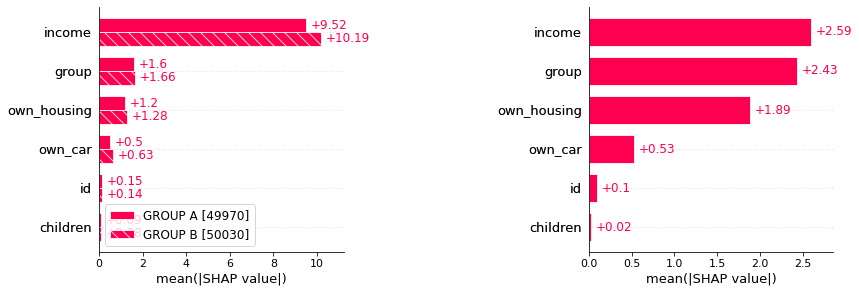

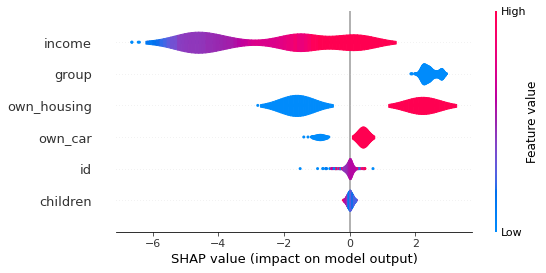

Affected Attribute Comparison
Average Comparison to True Class Members


Average Comparison to All Members


Random Affected Decision Process


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


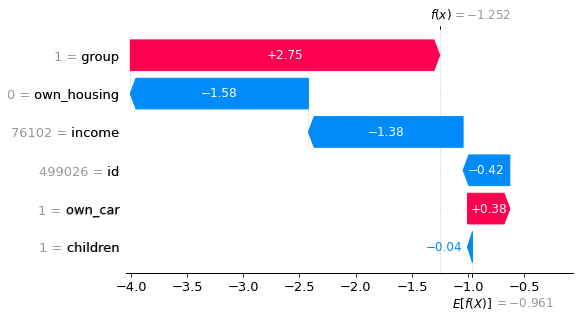

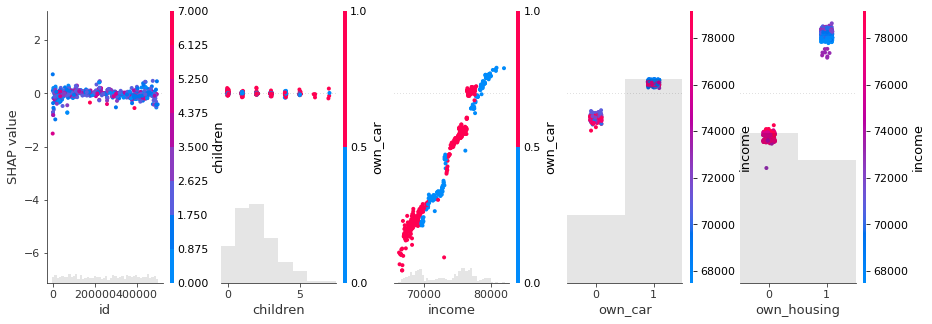

In [41]:
sensitive = 'group' # sensible variable one wants to test for biases
labels = {0:'GROUP A',1:'GROUP B'} # 0 - Group A  and 1 - Group B 
fd.understand_shap(labels,sensitive,1,0)

# Brief explanation
Graph 1:

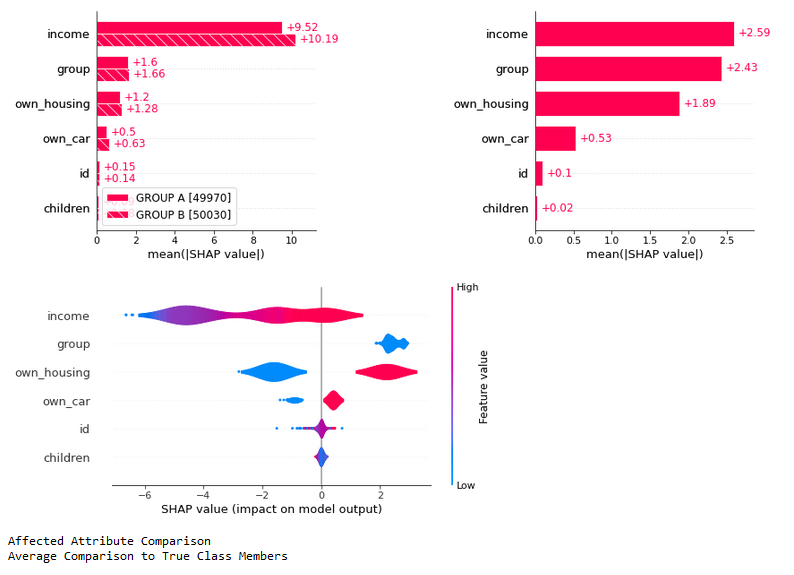

<font color=blue>__Bar Plots__</font><br>
Observing the pink graph on the right, we can see the overall feature importance, where the deal breaker is the income made in the year.

On the left we see GROUP A isolated. In the previous analysis we saw that even though the pvalue showed no disparity between the false negatives, group A had 5 points of difference. 

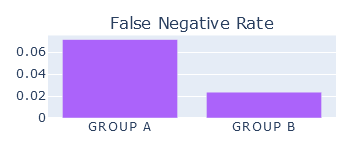

When running the SHAP, we can see the weight of the variables have on GROUP A. It seems that belonging to the group and the income this group makes have a significant weight as opposed to just the income in the general view. But not only that, also owning a house has an impact. Because we only have limited information, it is still risky to reassure what is this group actually making reference to. 

<font color=blue>__SHAP summary plot__</font><br>

Instead of looking at each individual instance, we can visualize the overall impact of these features across multiple instances using __SHAP summary plot__.The SHAP summary plot tells us the most important features and their range of effects over the dataset.From the plot above, we can gain some interesting insights into the model’s predictions:<br>
* The higher the income the more likly the user will be classified as 1 <br>
* The higher the own housing the more likely to be target 1 <br>
* The higher the you own a car the more likely you will be target 1 ( but is not as strong as the other outputs)<br> 
* Id has no impact <br>
* Number of children has no impact <br>

Graph 2: 

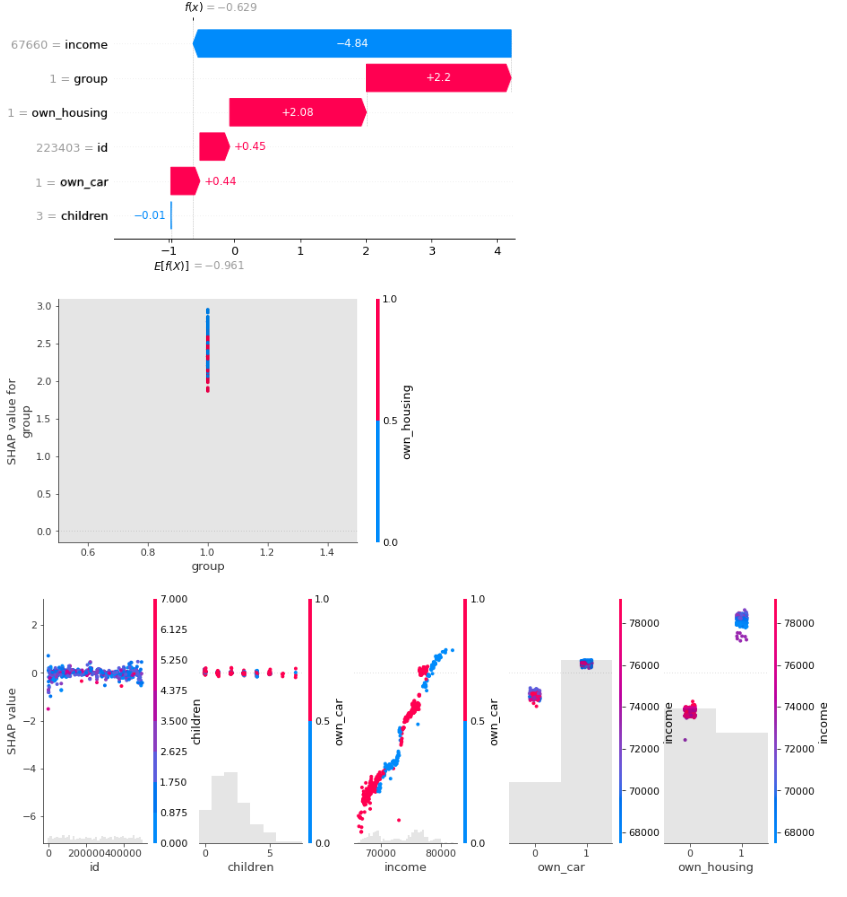

Selecting a random case, we can immediately see our hypothesis in play.
We can see a candidate with an income of 67660 monetary units- The model immediatly interprets this with a lot of importance, as a negative output in y, that is, being targeted for a credit card. We see however, the candidate´s attributes regarding housing, and group are pushing him to the credit card target area but this by itself it is not enough.

Graph 1 <br>
<font color=blue>__SHARP Waterfall__</font><br>
The blue bar shows how much a particular feature decreases the value of the prediction.
The red bar shows how much a particular feature increases the value of the prediction.
Negative values imply probabilities of less than 0.5 that this value has no influence.<br>
<br>
* Income: The Sharp value for this observation is given by the length, the absolute value shows how much income affects the prediction, so income contributes the most, Group contributes second, own housing, id a bit, own car. The sum of all SHARP values will equal to the E[f(x)] — f(x) ( where E[f(x)] is the expected value of the target variable and f(x) is the predicted value of the model)  <br>
* Further you can see the overall feature importance,an income of 67660 has the strongest impact, which is negative and then we see the importance of the isolated group A (value 1), in general, it seems as though the same factors are considered at roughly the same weight between group A and B. However, we do notice a larger gap within the sharp values seeing that it is of higher importance to the model with group A.  It is a clear indication that a certain sub characteristic of the Group A group is contributing to the incorrect labels.

<font color=blue>__SHAP Dependence Scatter Plot__</font><br>
We can observe the effect of a single feature on all predictions made by the model using the SHAP dependence scatter plot. <br>
The x-axis is the value of the feature<br>
The y-axis is the SHAP value for that feature, which represents how much knowing that feature's value changes the output of the model for that sample's prediction. For this model the target value is 1 or 0. <br>
The color corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically)<br>

* The scatter plot will attempt to pick out the feature column with the strongest interaction with group<br>
* The first value ID shows very well that is has no influence on on the sharp value<br>
* The second graph children has the strongest interaction with group own_car,the number of children has no effect on the number of cars and the sharp value stays the same<br>
* The higher the income, the higher is the effect on the target value 1 or 0, the strongest interaction variable is with having a car <br>
* Having a car has a marginal impact on sharp values, but the strongest interaction variable is income<br>
* Owning a house has a big impact on the sharp value, and the strongest interaction variable is income<br>

<font color=blue>__Conclusion__</font> <br>
Finally, by looking at the differences in the average values of the three primary model factors, we can see that the average male, incorrectly labeled as being of low risk tends to have lower checking account labels, a higher credit amount, as well as duration as opposed to people who were correctly labeled as having no risk. Moving into the final “act” stage of our framework, we can hypothesize that certain men, with small checking accounts, but with higher than average credit amounts and durations could be subject to further inspection to minimize the privilege and minimize risk for the bank. Finally, to culminate the research results, we go into our final case of the synthetic credit card approval dataset in which we will use a Neural Network to cover another model and provide a different view of opaqueness.

<a id='10'></a>
# 10. Documentation of methods (docstrings)

In [43]:
import fair_detect_group_a

In [44]:
print (fair_detect_group_a.Report.__doc__)

 
        NAME: Report

        DESCRIPTION: A report module based on Seaborn
        Report takes the imported data set and returns a distribution of each of the 
        variables without having to call seaborn.pairplot.

        PARAMETERS: data (pandas dataframe) and dependent variable 

        RETURNS: Pairplots, violin and heatmap graphs made in seaborn

    


In [46]:
print (fair_detect_group_a.Backup.__doc__)

 
        NAME: Backup

        DESCRIPTION: A duplication method to backup the original dataset

        PARAMETERS: data (pandas dataframe)

        RETURNS: A new dataframe with backed up data

    


In [47]:
print (fair_detect_group_a.EnhancedLabelEncoder.__doc__)

 
        NAME: LabelEncoder

        DESCRIPTION: Takes columns in original dataset and prompts user for a label in each of them

        PARAMETERS: data (pandas dataframe)

        RETURNS: Same dataframe with recoded names for columns

    


In [48]:
print (fair_detect_group_a.Splitting.__doc__)

 
        NAME: Splitting

        DESCRIPTION: Splits original dataset in X and y by removing all independent variables. X are the independent variables for a model, with the dependent already taken out
        y is the dependent variable already isolated

        PARAMETERS: data (pandas dataframe), dependent (dependent variables)

        RETURNS: X_train, X_test, y_train, y_test (with an 80-20% ratio for train and test respectively)

    


In [49]:
print (fair_detect_group_a.FairDetect.__doc__)

 
        NAME: FairDetect

        DESCRIPTION: A method framework to detect bias in classification datasets

        PARAMETERS: Check individual method

        RETURNS: Check individual method
    


In [50]:
print (fair_detect_group_a.FairDetect.__init__.__doc__)

Instatiation of model, X_test and y_test


In [51]:
print (fair_detect_group_a.FairDetect.representation.__doc__)


        METHOD: representation

        DESCRIPTION: Performs a chi-test and a xg-boost prediction to
        understand the relation between the original ratio, and the 
        predictions of the classifier. Based on this, the chi test is done
        between the attribute chosen (sensitive variable), and the target
        variable. It will automatically accept or reject the null hypothesis

        PARAMETERS: The sensitive group, labels previously defined, and predictions

        RETURNS: Accept or reject the null hypothesis between sensitive and target
        


In [52]:
print (fair_detect_group_a.FairDetect.ability.__doc__)


        METHOD: ability

        DESCRIPTION: A method to obtain the TPR (True Positive Rate), TNR (True 
        negative Rate), FPR (False Positive Rate), FNR (True Negative Rate)
        and store it as a variable

        PARAMETERS: sens_df returned in the representation method and the labels

        RETURNS: TPR, FNR, FPR, TNR
        


In [53]:
print (fair_detect_group_a.FairDetect.ability_plots.__doc__)


        METHOD: ability_plots

        DESCRIPTION: Method to plot bars with each of the rates for positives
        and negatives as previously obtained in ability

        PARAMETERS: labels,TPR(True Positive Rate),FPR(True Positive Rate),
        TNR(True Negative Rate) ,FNR(False Negative Rate)

        RETURNS: A bar plot of the ability disparties of each TPR, FPR,TNR,FNR 
        based on the senstive variable
        


In [54]:
print (fair_detect_group_a.FairDetect.ability_metrics.__doc__)


        METHOD: ability_metrics

        DESCRIPTION: Method to test the null hypothesis between TPR, FPR, TNR and FNR
        respectively with a given p value

        PARAMETERS: TPR(True Positive Rate),FPR(True Positive Rate),
        TNR(True Negative Rate) ,FNR(False Negative Rate)

        RETURNS: A message accepting or rejecting the null hypothesis, with the 
        respective p-values 
        


In [55]:
print (fair_detect_group_a.FairDetect.predictive.__doc__)


        METHOD: Predictive Parity 

        DESCRIPTION: This model shows the predictive Paritybased on the sensitive 
        group.

        PARAMETERS: sens_df, labels

        RETURNS: Predictive disparity based on the senstive variables and test the 
        Hypothesis H0: No Significant Predictive Disparity.
        precision_dic,fig,pred_p
        


In [56]:
print (fair_detect_group_a.FairDetect.identify_bias.__doc__)


        METHOD: identify_bias

        DESCRIPTION: Identifies the bias by comparing the average of all attributes
        to one group vs to all groups in a graphical manner

        PARAMETERS: The sensitive group and the labels

        RETURNS: The representative Model, the ability plots and ability metrics and 
        predictive diparity
        


In [57]:
print (fair_detect_group_a.FairDetect.understand_shap.__doc__)


        METHOD: understand_shap

        DESCRIPTION: Identifies the bias by comparing the average of all attributes
        to one group vs to all groups in a graphical manner. The group is the
        previously identified as the affected one

        PARAMETERS: The sensitive group, labels, affected group and affected target

        RETURNS: A graph with mean sharp values, violin graph, bar graphs with the 
        average comparisom to true class members, average comparison to all members, 
        sharp waterfall and dependency scatter plot
        


<a id='11'></a>
# 11. Google´s What if tool

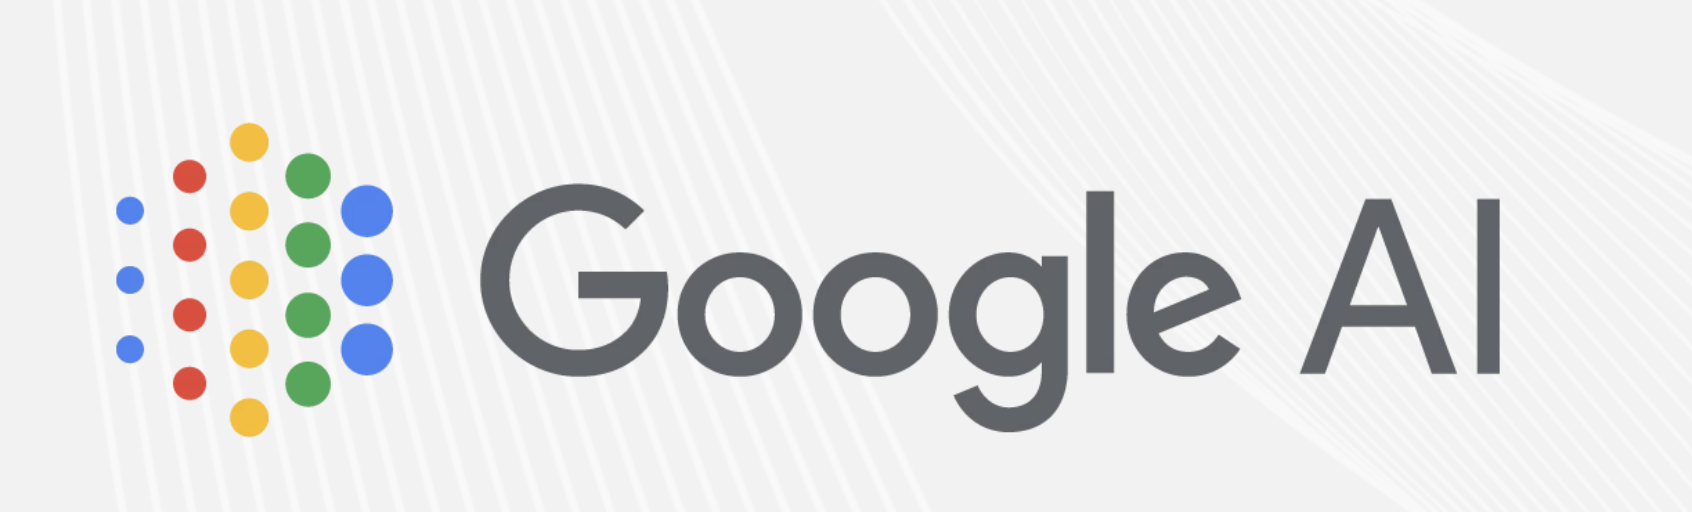

# Sections 
* [1. Introduction](#11.1)
* [2.Libaries used](#11.2)
* [3. Test Datset](#11.3)
* [4. Feature Engineering & Model Prediction](#11.4)  
* [5. Model Prediction](#11.5) 
* [6. WHat if tool](#11.6)

<a id='11.1'></a>
## 1. Introduction 

A key challenge in developing and deploying responsible Machine Learning (ML) systems is understanding their performance across a wide range of inputs.

Using WIT, you can test performance in hypothetical situations, analyze the importance of different data features, and visualize model behavior across multiple models and subsets of input data, and for different ML fairness metrics.

<a id='11.2'></a>
## 2. Libaries and pip installments used

In [58]:
import sys
python_version = sys.version_info[0]

In [59]:
# If you're running on Colab, you'll need to install the What-if Tool package and authenticate on the TF instance
def pip_install(module):
    if python_version == '2':
        !pip install {module} --quiet
    else:
        !pip3 install {module} --quiet

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    pip_install('witwidget')

    from google.colab import auth
    auth.authenticate_user()

In [60]:
!pip install witwidget

In [61]:
!jupyter nbextension install --py --symlink --sys-prefix witwidget

2022-07-30 20:01:54.369845: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-07-30 20:01:54.369932: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Installing C:\Users\young\anaconda3\lib\site-packages\witwidget\static -> wit-widget
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable witwidget --py --sys-prefix
    


In [62]:
!jupyter nbextension enable --py --sys-prefix witwidget

2022-07-30 20:02:05.562492: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-07-30 20:02:05.562543: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Enabling notebook extension wit-widget/extension...
      - Validating: ok


In [63]:
import pandas as pd
import numpy as np
import witwidget

from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

<a id='11.3'></a>
## 3.Test Dataset

Using the same Data as in Fairdetect

In [64]:
data

,id,children,group,income,own_car,own_housing,target
0,1,4,0,36151,0,0,0
1,2,0,0,36095,1,0,0
2,3,2,1,62110,1,1,0
3,4,0,1,73644,1,0,0
4,5,3,0,99146,0,0,1
...,...,...,...,...,...,...,...
499995,499996,1,0,43299,1,1,0
499996,499997,8,1,75956,1,1,1
499997,499998,3,0,66476,0,0,0
499998,499999,2,1,74524,0,0,0


<a id='11.4'></a>
## 4. Feature Engineering & Model Prediction 
We used the same model as already used before and the same prediction of the dataset 

In [65]:
X_test = X_test.to_numpy()

In [66]:
y_test = y_test.to_numpy()

In [67]:
X_test

array([[194258,      1,      1,  92093,      1,      1],
       [396320,      2,      0,  81071,      1,      0],
       [138739,      4,      0,  83536,      0,      0],
       ...,
       [285429,      2,      0,  67481,      1,      0],
       [ 48362,      4,      1,  68047,      1,      0],
       [124894,      1,      1,  83803,      1,      1]], dtype=int64)

In [68]:
# Combine the features and labels into one array for the What if Tool
test_examples = np.hstack((X_test,y_test.reshape(-1,1)))

<a id='11.5'></a>
## 5. What if tool 

Create a WitConfigBuilder to pass various parameters about your model and your AI Platform Prediction project to the What-If Tool. You can use the What-If Tool to inspect one model, or to compare two models. Fill in the appropriate values for your own Google Cloud project, your AI Platform Prediction model and version, and other values as appropriate for your model.

### Several JSON files in directory, tried all, yet error still appears

In [69]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="folkloric-grid-353308-1ac2537b3581.json"

In [70]:
# Create a What-if Tool visualization, it may take a minute to load
# See the cell below this for exploration ideas

# This prediction adjustment function is needed as this xgboost model's
# prediction returns just a score for the positive class of the binary
# classification, wherea  the What-If Tool expects a list of scores for each
# class (in this case, both the negative class and the positive class).
# PROJECT_ID = 'fairdetect'
# MODEL_NAME = 'Whatif'
# VERSION_NAME = 'v1'
# TARGET_FEATURE = 'Target'
# LABEL_VOCAB = ['0', '1']


def adjust_prediction(y_test_predict):
  return [1 - y_test_predict, y_test_predict]

config_builder = (WitConfigBuilder(test_examples.tolist(), data.columns.tolist() + ['Target'])
    .set_ai_platform_model('folkloric-grid-353308', 'Whatif', 'v2')
    .set_target_feature('Target')
    .set_label_vocab([0, 1]))
WitWidget(config_builder, height=1000)

WitWidget(config={'model_type': 'classification', 'label_vocab': [0, 1], 'feature_names': ['id', 'children', '…

<a id='12'></a>
# 12. FairML

# Sections 
* [Libaries used](#12.0)
* [1. Introduction](#12.1)
* [2. Data Set & Feature Engineering & Prediction ](#12.2)
* [3. Model exploration](#12.3)  
* [4. FairML](#12.4) 

<a id='12.0'></a>
## Libaries and pip installments used

In [71]:
!pip install https://github.com/adebayoj/fairml/archive/master.zip
!pip install fairml --user

  Created wheel for fairml: filename=fairml-0.1.1.5-py3-none-any.whl size=9452 sha256=2d8ae6a92150b624de1f48333e335e4047d9aa2a3902b81819629678e2eef5b5
  Stored in directory: C:\Users\young\AppData\Local\Temp\pip-ephem-wheel-cache-ond3niw7\wheels\08\97\34\175b275f67537bbbf555616496ce129d2f2c6a64b5dc9774ed
Successfully built fairml


In [72]:
from fairml import audit_model
from fairml import plot_dependencies
import fairml
from collections import defaultdict
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns

<a id='12.1'></a>
## 1. Introduction 
### <font color=blue>Perturbation<font>

The basic idea behind FairML (and many other attempts to audit or interpret model behavior) is to measure a __model’s dependence__ on its inputs by changing them. If a _small_ change to an input feature dramatically changes the output, the model is __sensitive__ to the feature.

For example, imagine we have a predictive model of income that takes as input attributes age, occupation, and educational level. One way of determining the model’s dependence on age is to see how much the model’s prediction of an individual’s income changes if the individual’s age is slightly perturbed. If the model places high importance on age, then a slight change would result in a big change to the prediction.

But what if the input attributes are correlated? This is certainly true of age and education: there aren’t many 16-year olds with PhDs! This means that perturbing age alone will not provide an accurate measure of the model’s dependency on age. One has to perturb the other input attributes as well.

Orthogonal Projection as a Perturbation Scheme. 
The trick FairML uses to __counter this multicollinearity__ is __orthogonal projection__. FairML orthogonally projects the input to measure the dependence of the predictive model on each attribute.

More concretely, if we have a model, F, trained on two features x and y, the dependence of model F on x is determined by quantifying the change in output on a transformed input. This transformed input perturbs x, and the other feature y is made orthogonal to x.

The change in output between the perturbed input and the original input indicates the dependence of the model on a given attribute, and we can be confident that there are no hidden collinearity effects.

<img src="fairml.PNG" width=800 height=600 align="center">

In [73]:
help(fairml)

Help on package fairml:

NAME
    fairml

PACKAGE CONTENTS
    black_box_functionality
    graphing
    non_linear_expansion
    orthogonal_projection
    perturbation_strategies
    utils

FILE
    c:\users\young\anaconda3\lib\site-packages\fairml\__init__.py




<a id='12.2'></a>
## 2. Data Set & Feature Engineering & Prediction 
Feature engineering and prediction from the previous model has been used 

<a id='12.3'></a>
## 3. Model Exploration 

In [74]:
# call audit model with model
total, _ = audit_model(model.predict , X_train)

In [75]:
direct_pertubation_feature_output_dictionary = defaultdict(list)
complete_perturbation_dictionary = defaultdict(list)

Feature: id,	 Importance: -0.3625625
Feature: children,	 Importance: 0.3258325
Feature: group,	 Importance: 0.28765
Feature: income,	 Importance: 0.387085
Feature: own_car,	 Importance: 0.2988625
Feature: own_housing,	 Importance: 0.19498


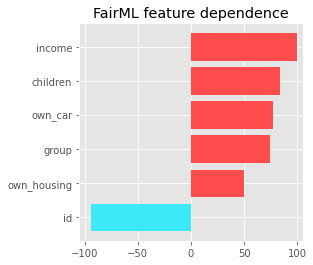

In [76]:
# print feature importance
print(total)

# generate feature dependence plot
fig = plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML feature dependence"
)
plt.savefig("fairml_ldp.eps", transparent=False, bbox_inches='tight')

Relative feature dependence ranking obtained from FariML. 
__Red__ indicates that the factor __highly contributes to a high recidivism rating__ by COMPAS.

In [77]:
file_name = "fairml_ldp.png"
plt.savefig(file_name, transparent=False, bbox_inches='tight', dpi=250)

<Figure size 432x288 with 0 Axes>

<a id='12.4'></a>
## 4. Model Conclusion 

The crucial point to note is: when we account for multicollinearity using FairML detect that the most significant variable is the income, followed by number of children, having a car, group and own_housing. Id is as expected has no impact on the model. 

<a id='13'></a>
# 13. Additional Analysis 
Based on the previous analysis of GOOGLE what-if-tool and FairML there has been two income buckets identified,which are from 70k to 79999, 80k to 90k and the remaining values,  which was missed by original analysis of Ryan fairdetect.

In [78]:
data

,id,children,group,income,own_car,own_housing,target
0,1,4,0,36151,0,0,0
1,2,0,0,36095,1,0,0
2,3,2,1,62110,1,1,0
3,4,0,1,73644,1,0,0
4,5,3,0,99146,0,0,1
...,...,...,...,...,...,...,...
499995,499996,1,0,43299,1,1,0
499996,499997,8,1,75956,1,1,1
499997,499998,3,0,66476,0,0,0
499998,499999,2,1,74524,0,0,0


First we exclude the income range, where we have not seen any bias based on the google what if analysis, which are the outer ranges, all above 90k and below 70k. 

In [79]:
df1 = data[(data['income']>90000)]

In [80]:
df2 = data[(data['income']<70000)]

Combining these two in a dataframe. 

In [81]:
df_all_rows = pd.concat([df1, df2])

In [82]:
df_all_rows.describe()

,id,children,group,income,own_car,own_housing,target
count,365704.000000,365704.000000,365704.000000,365704.000000,365704.000000,365704.000000,365704.000000
mean,250070.982016,2.002294,0.513084,69753.808706,0.703312,0.403851,0.354467
std,144262.955042,1.410819,0.499829,26082.867693,0.456798,0.490669,0.478352
min,1.000000,0.000000,0.000000,30000.000000,0.000000,0.000000,0.000000
25%,125237.750000,1.000000,0.000000,48268.000000,0.000000,0.000000,0.000000
50%,250067.000000,2.000000,1.000000,62018.500000,1.000000,0.000000,0.000000
75%,374868.250000,3.000000,1.000000,95668.000000,1.000000,1.000000,1.000000
max,500000.000000,11.000000,1.000000,119999.000000,1.000000,1.000000,1.000000


In [83]:
x_below = df_all_rows.drop('target',axis=1)
y_below = df_all_rows['target']

In [84]:
Below_predict = model.predict(x_below)

Using only the indentify bias to check if there is a bias between the groups. 

In [85]:
fd = FairDetect(model, x_below, y_below)

Confusion Matrix


Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    236074
           1       0.99      0.99      0.99    129630

    accuracy                           0.99    365704
   macro avg       0.99      0.99      0.99    365704
weighted avg       0.99      0.99      0.99    365704

AUC 0.9933019169672374
REPRESENTATION


Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


╒════╤═══════════╤═══════════╕
│    │   GROUP A │   GROUP B │
╞════╪═══════════╪═══════════╡
│  0 │  0.807365 │  0.491955 │
├────┼───────────┼───────────┤
│  1 │  0.192635 │  0.508045 │
╘════╧═══════════╧═══════════╛ 

*** Reject H0: Significant Relation Between group and Target with p= 0.0


ABILITY


Accept H0: True Positive Disparity Not Detected. p= 0.9524384629437816
Accept H0: False Positive Disparity Not Detected. p= 0.557756158424129
Accept H0: True Negative Disparity Not Detected. p= 0.9705026881603004
Accept H0: False Negative Disparity Not Detected. p= 0.47378103516733616


PREDICTIVE


Accept H0: No Significant Predictive Disparity. p= 0.8555816323030165


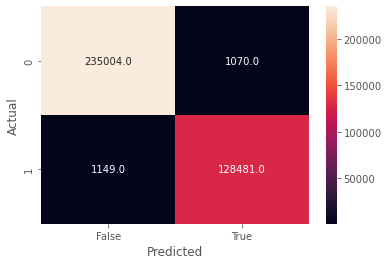

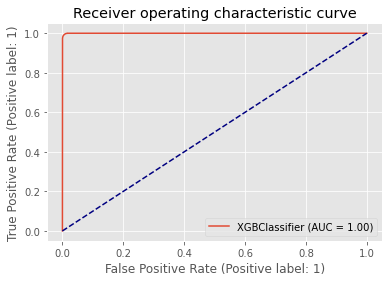

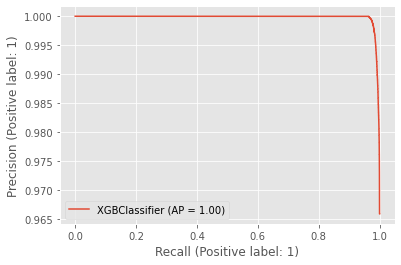

In [86]:
sensitive = 'group' # sensible variable one wants to test for biases
labels = {0:'GROUP A',1:'GROUP B'} # 0 - GROUP A and 1 - GROUP B Because we dont know yet what Group is referring to
fd.identify_bias(sensitive,labels)

Now we are checking the income group between 70000 and 79999 to see if there is a bias in the model.

In [87]:
df3 = data[data['income'].between(70000,79999,inclusive=False)]

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.


In [88]:
df3.describe()

,id,children,group,income,own_car,own_housing,target
count,67092.000000,67092.000000,67092.000000,67092.000000,67092.000000,67092.000000,67092.000000
mean,250232.219177,1.999165,0.467224,75010.205226,0.694345,0.396396,0.273088
std,144482.799083,1.414551,0.498928,2892.416763,0.460688,0.489152,0.445549
min,4.000000,0.000000,0.000000,70001.000000,0.000000,0.000000,0.000000
25%,125369.500000,1.000000,0.000000,72510.000000,0.000000,0.000000,0.000000
50%,249960.500000,2.000000,0.000000,75001.000000,1.000000,0.000000,0.000000
75%,376109.500000,3.000000,1.000000,77504.250000,1.000000,1.000000,1.000000
max,499999.000000,11.000000,1.000000,79998.000000,1.000000,1.000000,1.000000


In [89]:
x_bias1 = df3.drop('target',axis=1)
y_bias1 = df3['target']

In [90]:
Bias1_predict = model.predict(x_bias1)

In [91]:
fd = FairDetect(model, x_bias1, y_bias1)

Confusion Matrix


Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     48770
           1       0.86      0.86      0.86     18322

    accuracy                           0.92     67092
   macro avg       0.90      0.90      0.90     67092
weighted avg       0.92      0.92      0.92     67092

AUC 0.9046849820282588
REPRESENTATION


Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


╒════╤═══════════╤═══════════╕
│    │   GROUP A │   GROUP B │
╞════╪═══════════╪═══════════╡
│  0 │ 0.981088  │  0.437075 │
├────┼───────────┼───────────┤
│  1 │ 0.0189117 │  0.562925 │
╘════╧═══════════╧═══════════╛ 

*** Reject H0: Significant Relation Between group and Target with p= 0.0


ABILITY


*** Reject H0: Significant True Positive Disparity with p= 4.470452350000946e-16
*** Reject H0: Significant False Positive Disparity with p= 2.254228321288676e-05
Accept H0: True Negative Disparity Not Detected. p= 0.17845436500552436
*** Reject H0: Significant False Negative Disparity with p= 1.8756216687138258e-15


PREDICTIVE


* Reject H0: Significant Predictive Disparity with p= 0.0924004228489655


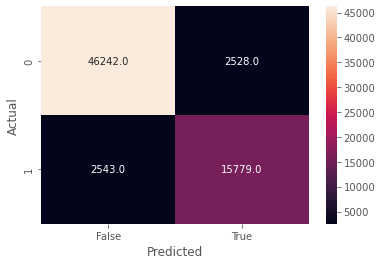

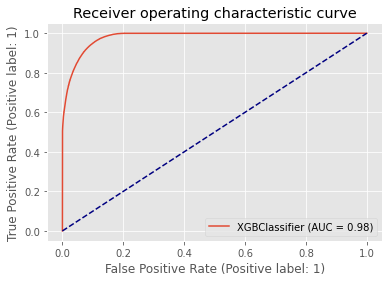

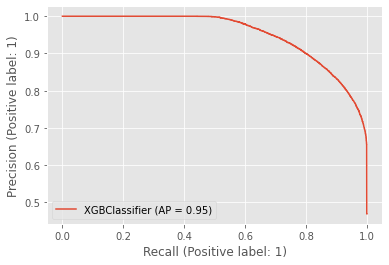

In [92]:
sensitive = 'group' # sensible variable one wants to test for biases
labels = {0:'GROUP A',1:'GROUP B'} # 0 - GROUP A and 1 - GROUP B Because we dont know yet what Group is referring to
fd.identify_bias(sensitive,labels)

The third dataframe will between 80000 and 90000 to see if there is a bias in the model.

In [93]:
df4 = data[data['income'].between(80000,90000,inclusive=False)]

Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.


In [94]:
x_bias2 = df4.drop('target',axis=1)
y_bias2 = df4['target']

In [95]:
Bias2_predict = model.predict(x_bias2)

In [96]:
fd = FairDetect(model, x_bias2, y_bias2)

Confusion Matrix


Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


              precision    recall  f1-score   support

           0       0.88      0.87      0.87     21829
           1       0.94      0.94      0.94     45347

    accuracy                           0.92     67176
   macro avg       0.91      0.91      0.91     67176
weighted avg       0.92      0.92      0.92     67176

AUC 0.9059791230401305
REPRESENTATION


Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


╒════╤═══════════╤═══════════╕
│    │   GROUP A │   GROUP B │
╞════╪═══════════╪═══════════╡
│  0 │  0.598142 │ 0.0123843 │
├────┼───────────┼───────────┤
│  1 │  0.401858 │ 0.987616  │
╘════╧═══════════╧═══════════╛ 

*** Reject H0: Significant Relation Between group and Target with p= 0.0


ABILITY


Accept H0: True Positive Disparity Not Detected. p= 0.18188295524911763
*** Reject H0: Significant False Positive Disparity with p= 6.202491277917436e-14
*** Reject H0: Significant True Negative Disparity with p= 2.453914234203452e-13
*** Reject H0: Significant False Negative Disparity with p= 2.3261419001485302e-05


PREDICTIVE


Accept H0: No Significant Predictive Disparity. p= 0.22104648096010626


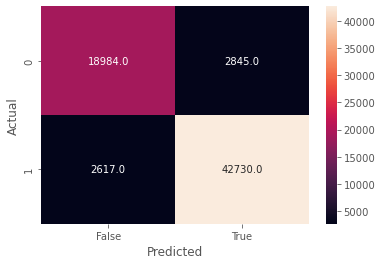

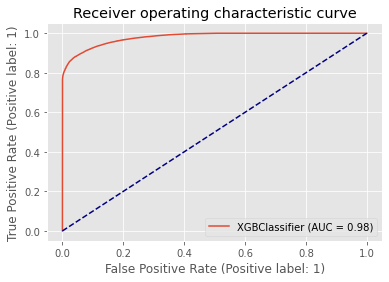

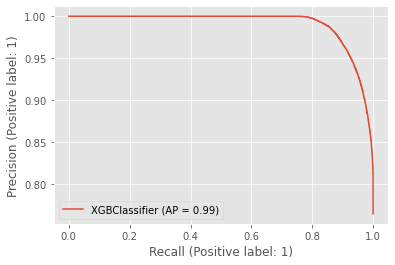

In [97]:
sensitive = 'group' # sensible variable one wants to test for biases
labels = {0:'GROUP A',1:'GROUP B'} # 0 - GROUP A and 1 - GROUP B Because we dont know yet what Group is referring to
fd.identify_bias(sensitive,labels)

As expected there is a bias in the two new created ranges in income between the two groups. 

<img src="group_a.png" width=200 height=100 align="left">

## <font color=DarkRed>__Team A - MBD Part Time 2022 - 23__</font>